In [14]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv

In [2]:
path = '/media/capstone/HDD2/source_data/MozillaCV/en/validated.tsv'

In [3]:
en_data = pd.read_table(path)[['path', 'accents']]

In [5]:
en_data

,path,accents
0,common_voice_en_27710027.mp3,NaN
1,common_voice_en_699711.mp3,NaN
2,common_voice_en_21953345.mp3,NaN
3,common_voice_en_18132047.mp3,NaN
4,common_voice_en_27340672.mp3,NaN
...,...,...
1617872,common_voice_en_34672241.mp3,"German English,Non native speaker"
1617873,common_voice_en_34737501.mp3,"German English,Non native speaker"
1617874,common_voice_en_34737613.mp3,"German English,Non native speaker"
1617875,common_voice_en_34737887.mp3,"German English,Non native speaker"


In [4]:
durations = []

In [5]:
for audio in tqdm(en_data['path']):
    data, samplerate = sf.read(os.path.join('/media/capstone/HDD2/source_data/MozillaCV/en/clips', f'{audio[:-3]}wav', ))
    duration = data.shape[0] / samplerate
    durations.append(duration)

100%|████████████████████████████████| 1617877/1617877 [58:27<00:00, 461.30it/s]


In [6]:
bins = np.arange(0, 12, 0.1)

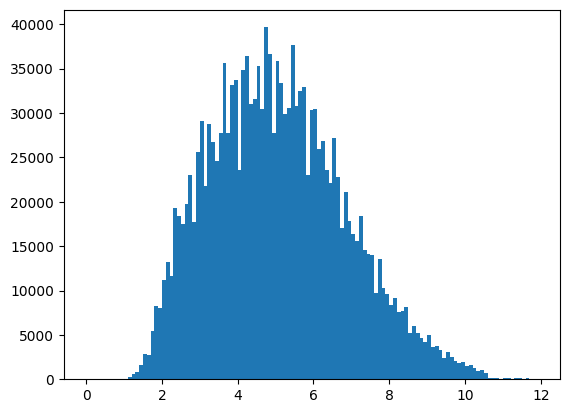

In [8]:
plt.hist(durations, bins=bins);
plt.savefig('hist.png')

In [6]:
accent_data = en_data[en_data['accents'].notnull()]

In [8]:
accent_data = accent_data.reset_index()

In [9]:
accent_data

,index,path,accents
0,37,common_voice_en_30136178.mp3,"England English,United States English"
1,64,common_voice_en_22338655.mp3,Hong Kong English
2,80,common_voice_en_30699821.mp3,England English
3,85,common_voice_en_18277778.mp3,United States English
4,94,common_voice_en_20586574.mp3,"United States English,wolof"
...,...,...,...
861129,1617872,common_voice_en_34672241.mp3,"German English,Non native speaker"
861130,1617873,common_voice_en_34737501.mp3,"German English,Non native speaker"
861131,1617874,common_voice_en_34737613.mp3,"German English,Non native speaker"
861132,1617875,common_voice_en_34737887.mp3,"German English,Non native speaker"


In [13]:
accent_data.groupby(['accents']).count().sort_values(by='path', ascending=False)

,path
accents,
United States English,389397
England English,134595
"India and South Asia (India, Pakistan, Sri Lanka)",101067
Canadian English,61132
Australian English,51593
...,...
Non-native,1
Polish English,1
"United States English,California",1


In [14]:
accent_data.groupby(['accents']).count().sort_values(by='path', ascending=False).to_csv('accents_csv')

In [15]:
with open('accent_durations.csv', 'w') as file:
    header = csv.writer(file)
    header.writerow(['path', 'accent', 'duration'])

In [28]:
with open('accent_durations.csv', 'a+') as file:
    csvwriter = csv.writer(file)
    index = 0
    for audio in tqdm(accent_data['path']):
        accent = accent_data[accent_data['path'] == audio]['accents'][index]
        data, samplerate = sf.read(os.path.join('/media/capstone/HDD2/source_data/MozillaCV/en/clips', f'{audio[:-3]}wav'))
        duration = data.shape[0] / samplerate
        csvwriter.writerow([audio, accent, duration])
        index+=1 

100%|██████████████████████████████████████████████████████████████████████████████████| 861134/861134 [10:30:47<00:00, 22.75it/s]


In [32]:
path_new = '/home/capstone/Desktop/Krisp/Capstone/accent_durations.csv'

In [35]:
accents = pd.read_csv(path_new, names=['path', 'accent', 'duration'])

In [36]:
accents

,path,accent,duration
0,common_voice_en_30136178.mp3,"England English,United States English",8.820
1,common_voice_en_22338655.mp3,Hong Kong English,5.208
2,common_voice_en_30699821.mp3,England English,8.388
3,common_voice_en_18277778.mp3,United States English,5.376
4,common_voice_en_20586574.mp3,"United States English,wolof",6.960
...,...,...,...
861129,common_voice_en_34672241.mp3,"German English,Non native speaker",5.148
861130,common_voice_en_34737501.mp3,"German English,Non native speaker",8.748
861131,common_voice_en_34737613.mp3,"German English,Non native speaker",3.960
861132,common_voice_en_34737887.mp3,"German English,Non native speaker",4.428


In [37]:
groupiaccents.groupby(['accent']).sum()# .sort_values(by='path', ascending=False)

/tmp/ipykernel_3586116/984164846.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  accents.groupby(['accent']).sum()#.sort_values(by='path', ascending=False)


,duration
accent,
2nd Language,106.236
A variety of Texan English with some German influence that has undergone the cot-caught merger,50.076
A'lo,6.048
Afrikaans English,18.216
Argentinian English,5.652
...,...
polish accent,40.356
"serbian,United States English",82.044
"slighty Southern affected by decades in the Midwest, 4 years in Spain and Germany, speak some German, Spanish, Polish. Have lived in nine states.",32.256
